In [14]:
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from tqdm.auto import tqdm

import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [3]:
#Loading in the daasets
subset_index = 1000
with open('sparse_random_activations_lora_orca_A1.pkl', 'rb') as f:
        sparse_activations_orca = pickle.load(f)[:subset_index]
        
with open('dense_activations_lora_orca_A1.pkl', 'rb') as f:
        dense_activations_orca = pickle.load(f)[:subset_index]


with open('../sparse_random_activations_lora_B3.pkl', 'rb') as f:
        sparse_activations_gsm8k = pickle.load(f)[:subset_index]
        

with open('../dense_activations_lora_B2.pkl', 'rb') as f:
        dense_activations_gsm8k = pickle.load(f)[:subset_index]
        


In [4]:
dense_activations_gsm8k.shape


(1000, 262144)

In [5]:
dense_activations_orca.shape

(1000, 262144)

In [6]:
dense_activations_orca

array([[ 0.11139321, -0.38142958,  0.729128  , ..., -0.10851642,
         0.02500831, -0.04015889],
       [ 0.11139321, -0.38142958,  0.729128  , ..., -0.10851642,
         0.02500831, -0.04015889],
       [ 0.11139321, -0.38142958,  0.729128  , ..., -0.10851642,
         0.02500831, -0.04015889],
       ...,
       [ 1.4888468 ,  1.2717168 , -1.5147573 , ..., -0.98383653,
         1.2942158 ,  1.6858829 ],
       [ 1.4888468 ,  1.2717168 , -1.5147573 , ..., -0.47049898,
         1.2357731 ,  1.7612337 ],
       [ 1.4888468 ,  1.2717168 , -1.5147573 , ..., -0.9484415 ,
         1.4208834 ,  1.722862  ]], dtype=float32)

In [7]:
dense_activations_gsm8k

array([[ 0.10996075, -0.38161087,  0.72923684, ..., -0.11516419,
         0.02778258, -0.04560016],
       [ 0.10996075, -0.38161087,  0.72923684, ..., -0.11516419,
         0.02778258, -0.04560016],
       [ 0.10996075, -0.38161087,  0.72923684, ..., -0.11516419,
         0.02778258, -0.04560016],
       ...,
       [ 1.489735  ,  1.2876704 , -1.52733   , ..., -0.18475074,
         1.3043327 ,  1.0310438 ],
       [ 1.489735  ,  1.2876704 , -1.52733   , ..., -0.17085631,
         1.41423   ,  1.6497204 ],
       [ 1.489735  ,  1.2876704 , -1.52733   , ..., -0.12469962,
         1.410714  ,  1.1317629 ]], dtype=float32)

In [8]:
#Combine dense and sparse activations
all_dense = np.vstack((dense_activations_orca, dense_activations_gsm8k))
all_sparse = np.vstack((sparse_activations_orca, sparse_activations_gsm8k))

# Labels: 1 for dense, 0 for sparse
labels_dense = np.ones(all_dense.shape[0])
labels_sparse = np.zeros(all_sparse.shape[0])



In [9]:
# Combine all activations and labels
all_activations = np.vstack((all_dense, all_sparse))
all_labels = np.concatenate((labels_dense, labels_sparse))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_activations, all_labels, test_size=0.2, random_state=42)


In [11]:
classifier = SGDClassifier(loss='log_loss', max_iter=1000)
classifier.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

Accuracy: 0.90875
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       378
         1.0       0.92      0.90      0.91       422

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



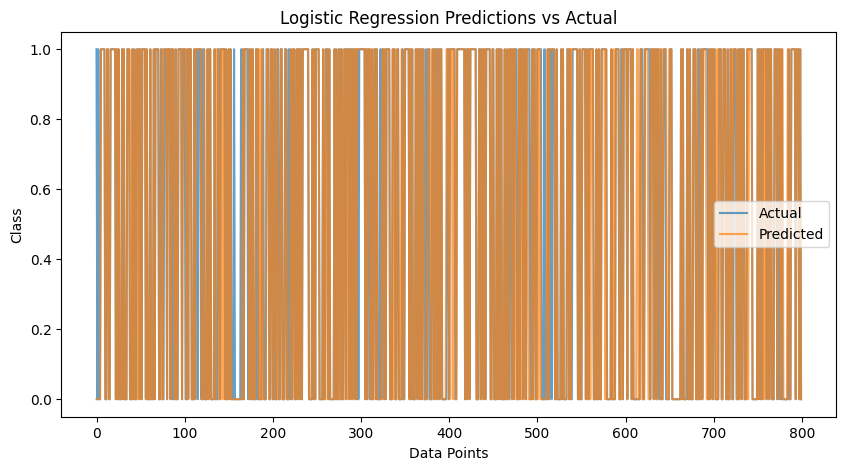

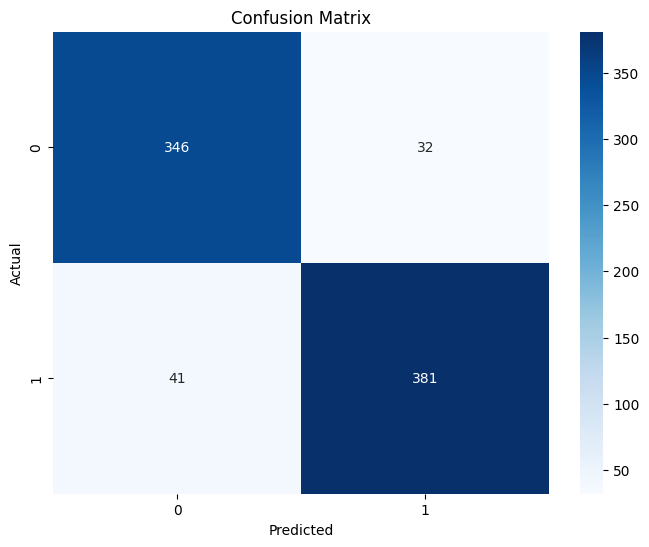

In [15]:
import seaborn as sns
# Predict the labels for the test set
y_pred = classifier.predict(X_test)
#create random 0s and 1s in y_pred
#y_pred = np.random.randint(0, 2, size=y_test.shape)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the predicted labels vs. the actual labels
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Data Points')
plt.ylabel('Class')
plt.title('Logistic Regression Predictions vs Actual')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import pickle

# Specify the file path to save the pickle file
file_path = 'orca_gsm8k_lr_model.pkl'

# Write the classifier object to the pickle file
with open(file_path, 'wb') as f:
    pickle.dump(classifier, f)

: 

## PCA classifiers

In [10]:
# Initialize PCA with enough components to retain 95% of the variance
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the classifier
classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=1.0)
classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_pca)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

In [ ]:
#save the above classifier model
with open('classifier_v1.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [ ]:
# Initialize PCA with enough components to retain 95% of the variance
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_pca)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.4802734375
              precision    recall  f1-score   support

         0.0       0.48      0.70      0.57      2538
         1.0       0.47      0.27      0.34      2582

    accuracy                           0.48      5120
   macro avg       0.48      0.48      0.46      5120
weighted avg       0.48      0.48      0.46      5120



In [ ]:
# Initialize PCA with enough components to retain 95% of the variance
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_pca)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8314453125
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      2538
         1.0       0.85      0.81      0.83      2582

    accuracy                           0.83      5120
   macro avg       0.83      0.83      0.83      5120
weighted avg       0.83      0.83      0.83      5120



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classifier = LogisticRegression(max_iter=1000)


In [ ]:
#THE END